In [39]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, arange, linspace, meshgrid, cos, sin, pi, tan, abs, exp, log, arctan, sqrt, inf
from scipy.integrate import quad, dblquad
import mpl_toolkits.mplot3d

### Example 1

Let $\mathcal R = [1,5]\times[2,3]$. 

  a. Estimate $$\iint_\mathcal R (xy - y^2/6)dA$$ as a Riemann sum using 16 squares.

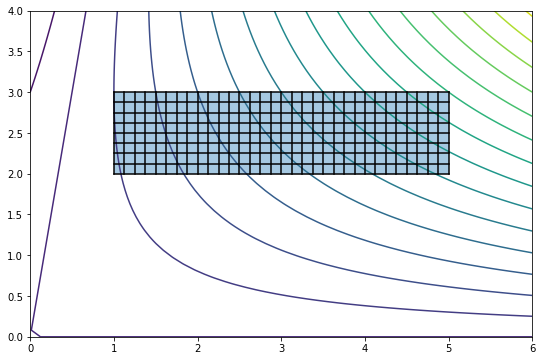

In [53]:
x = linspace(0,6)
y = linspace(0,4)
plt.figure(figsize=(9,6))
x,y = meshgrid(x,y)
plt.contour(x,y,x*y - y**2/6,levels=20);
plt.fill([1,5,5,1],[2,2,3,3],alpha = .4);

# Draw grid
M,N = (32,8)
dx = (5-1)/M
dy = (3-2)/N

[plt.plot([1 + i*dx,1 + i*dx],[2,3],'k') for i in range(M+1)];
[plt.plot([1,5],[2 + j*dy,2 + j*dy],'k') for j in range(N+1)];


For $\Delta x = (5 - 1)/M$ and  $\Delta y = (3-2)/N$, the Riemann sum is 

$$\sum_{i=0}^{M-1} \sum_{j=0}^{N-1} \left( (1+i\Delta x)(2+j\Delta y) - (j+\Delta y)^2/6\right)\Delta x\,\Delta y$$

In [29]:
M,N = (500,200)

dx = (5-1)/M
dy = (3-2)/N

def f(x,y):
    return x*y - y**2/6 

sum([f(1 + i*dx,2+j*dy) for i in range(M) for j in range(N)])*dx*dy

25.716148333333305

  b. Evaluate the definite integral in part a. 

In [6]:
dblquad(lambda y,x: x*y - y**2/6,1,5,2,3)

(25.77777777777778, 2.861908241255959e-13)

<p style="padding-bottom:40%;"> </p>

### Example 2 

Switch the order of integration of the following iterated integrals.

a. 
$$\int_0^1 \int_0^x f(x,y)\,dy\,dx $$

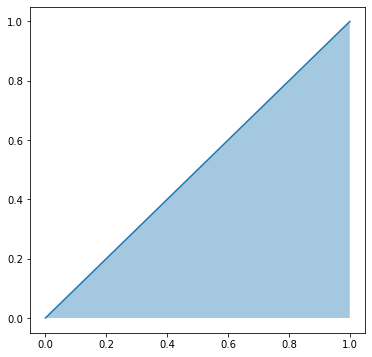

In [10]:
x = linspace(0,1,10) # this divides the interval from 0 to 1 into 10 pieces
plt.figure(figsize=(6,6))
plt.plot(x,x);
plt.fill_between(x,x,alpha=.4);

Pick an arbitrary integrand, here $x \cos(y)$, to test the 2 orders for integration. (Do mind the peculiarities of `dblquad` when dealing with orders of integration.)

$y$ on the inside: 

$$\int_0^1 \int_{0}^x x\cos(y)\, dy\,dx $$

In [11]:
dblquad(lambda y,x: x*cos(y),0,1,0,lambda x:x)

(0.3011686789397568, 9.308899714759727e-15)

$x$ on the inside: 

$$\int_0^1 \int_{y}^1 x\cos(y)\, dx\,dy $$

In [12]:
dblquad(lambda x,y: x*cos(y),0,1,lambda y:y,1)

(0.30116867893975674, 5.551075862445926e-15)

<p style="padding-bottom:40%;"> </p>

b.
$$\int_0^1 \int_0^{e^y} g(x,y)\,dx\,dy $$

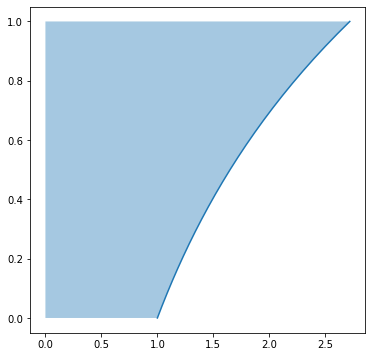

In [31]:
y = linspace(0,1,25)
plt.figure(figsize=(6,6))
plt.plot(exp(y),y)
plt.fill_betweenx(y,exp(y),alpha=.4);

$y$ on the inside (split region in 2): 

$$\int_0^1 \int_{0}^1 x\cos(y)\, dy\,dx  + \int_1^e \int_{\ln x}^1 x\cos(y)\, dy\,dx  $$

In [34]:
dblquad(lambda y,x: x*cos(y),0,1,0,1)[0] + dblquad(lambda y,x: x*cos(y),1,exp(1),log,1)[0]

1.2202324409250511

$x$ on the inside: 

$$\int_0^1 \int_{y}^1 x\cos(y)\, dx\,dy $$

In [35]:
dblquad(lambda x,y: x*cos(y),0,1,0,exp)

(1.220232440925051, 2.214038351994108e-14)

<p style="padding-bottom:40%;"> </p>

### Exercise

Let $\mathcal D$ be the region in the plane bounded by the curves $y=x+|x|$ and $y=x+1$. Compute $$ \iint_\mathcal D y\,dA$$ as an iterated integral. 

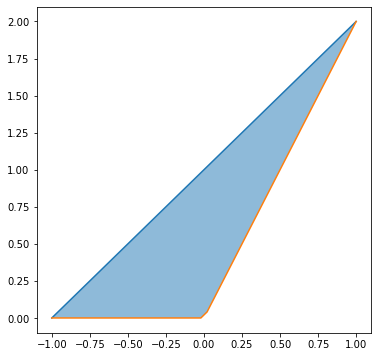

In [15]:
x = linspace(-1,1,50)
plt.figure(figsize=(6,6))
plt.plot(x,x+1,x,abs(x)+x);
plt.fill_between(x,x+1,abs(x)+x,alpha=.5);

$$\int_{-1}^0\int_{0}^{x+1} y \,dy\,dx +  \int_{0}^1\int_{2x}^{x+1} y \,dy\,dx $$

In [16]:
dblquad(lambda y,x: y, -1,1, lambda x:x + abs(x),lambda x:x+1)

(0.6666666666666667, 7.401486830834377e-15)

or $$\int_0^2\int_{y-1}^{y/2} y \,dx\,dy $$

In [17]:
dblquad(lambda x,y: y, 0,2, lambda y:y-1,lambda y:y/2)

(0.6666666666666667, 7.401486830834377e-15)

<p style="padding-bottom:40%;"> </p>

## Examples - Polar Coordinates
  

### Cool Example

Compute $$I = \int_{-\infty}^\infty e^{-x^2}\,dx.$$

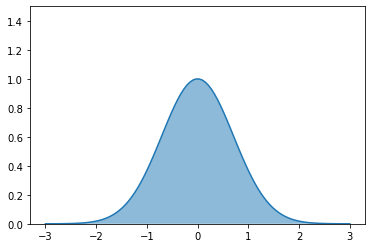

In [45]:
x = linspace(-3,3,100)
plt.fill_between(x,exp(-x**2),alpha=.5)
plt.ylim((0,3/2))
plt.plot(x,exp(-x**2));

We do the trick. 

$$I^2 = \left(\int_{-\infty}^\infty e^{-x^2}\,dx \right)\left(\int_{-\infty}^\infty e^{-y^2}\,dy \right)
$$

$$ = \int_{-\infty}^\infty e^{-x^2} \left(\int_{-\infty}^\infty e^{-y^2}\,dy \right) \,dx
$$

$$ = \int_{-\infty}^\infty\int_{-\infty}^\infty e^{-x^2}  e^{-y^2}\,dy  \,dx
$$

$$ = \iint_{\mathbb{R}^2} e^{-(x^2+y^2)} \,dA
$$



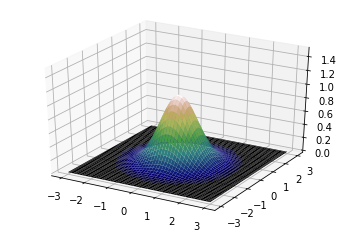

In [44]:
x = y = linspace(-3,3,100)
x,y = meshgrid(x,y)
ax = plt.gca(projection='3d');
ax.set_zlim((0,3/2))
ax.plot_surface(x,y,exp(-x**2-y**2),cmap='gist_earth');

Then evaluate with polar coordinates.

$$ = \int_0^{2\pi}\int_0^\infty e^{-r^2}r\,dr\,d\theta = \pi$$

so $$I = \sqrt\pi$$

In [19]:
quad(lambda x: exp(-x**2),-inf,inf) # numpy.inf is imported above

(1.7724538509055159, 1.4202636780944923e-08)

In [20]:
sqrt(pi)

1.7724538509055159

#### Exercise

Sketch the region of integration in the definite integral below and then evaluate it using polar coordinates. 

$$\int_0^1\int_{\sqrt{1-x^2}}^{\sqrt{4-x^2}} x\,dy\,dx + \int_1^2\int_{0}^{\sqrt{4-x^2}} x\,dy\,dx$$
  

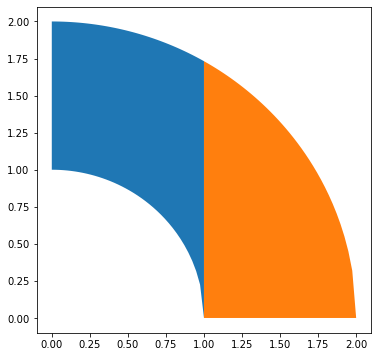

In [22]:
plt.figure(figsize=(6,6))
x = linspace(0,1,40)
plt.fill_between(x,sqrt(4-x**2),sqrt(1-x**2));
xs = linspace(1,2,40)
plt.fill_between(xs,sqrt(4-xs**2));

Just a piece of an annulus.

$$\int_0^{\pi/2} \int_1^2 (r\cos \theta)r \,dr\,d\theta$$

$$ = \left( \sin 
\theta \rvert_0^{\pi/2} \right) \left(\frac{r^3}{3}\big\rvert_1^2\right) = \frac73$$

In [23]:
dblquad(lambda r,t: r**2*cos(t),0,pi/2,1,2) # t first

(2.333333333333333, 2.5905203907920317e-14)